In [1]:
import tensorflow as tf 
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import models 
from tensorflow.keras.optimizers import Adam  
from tensorflow.keras.utils import plot_model 
from tensorflow.keras.layers import *
#필요한 텐서플로우 모듈 임폴트

from sklearn.model_selection import train_test_split 
#훈련, 테스트 세트 -> 훈련/검증, 테스트 세트를 만들기 위한 사이킷런 모듈 임폴트

import numpy as np 
import matplotlib.pyplot as plt  
#벡터연산과 그래프 그리기를 위한 맷플롯립 입폴트

plt.style.use('seaborn')
# 맷플롯립 스타일 = 시본 설정

C:\Users\leeky\AppData\Local\Temp\ipykernel_1404\2000857863.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
tf.random.set_seed(111)
# 딥러닝 수행 전 텐서플로 난수자원 초기화

In [3]:
(x_train_full, y_train_full), (x_test, y_test) = load_data()
# fashion mnist 데이터셋을 불러온 후 최초 훈련과 테스트 셋으로 분류
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.3, random_state=111)
# 훈련셋을 다시 훈련셋과 검증셋으로 분류
# 검증셋을 두는 이유 = 하이퍼 파라미터 성능 검증을 위해 시도

In [4]:
x_train.shape
# 42000개의 훈련데이터

(42000, 28, 28)

In [5]:
x_val.shape
# 18000개의 검증데이터

(18000, 28, 28)

In [6]:
x_test.shape
# 10000개의 테스트 데이터

(10000, 28, 28)

In [7]:
y_train.shape

(42000,)

In [8]:
y_val.shape

(18000,)

In [9]:
y_test.shape

(10000,)

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# 모델의 분류 타겟 = 총 10개

In [11]:
class_names[y_train[0]]

'Pullover'

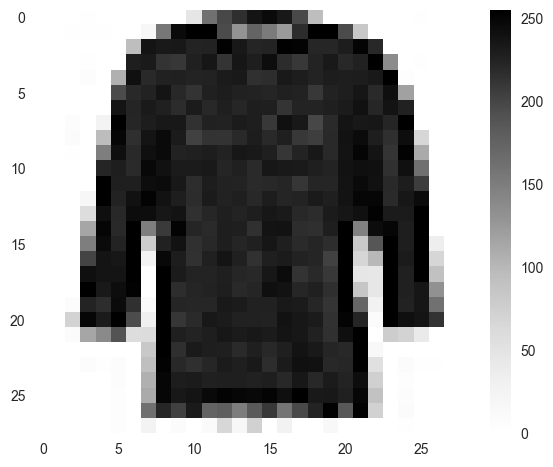

In [12]:
plt.figure()
plt.imshow(x_train[20])
plt.colorbar()
plt.grid(False)
plt.show()

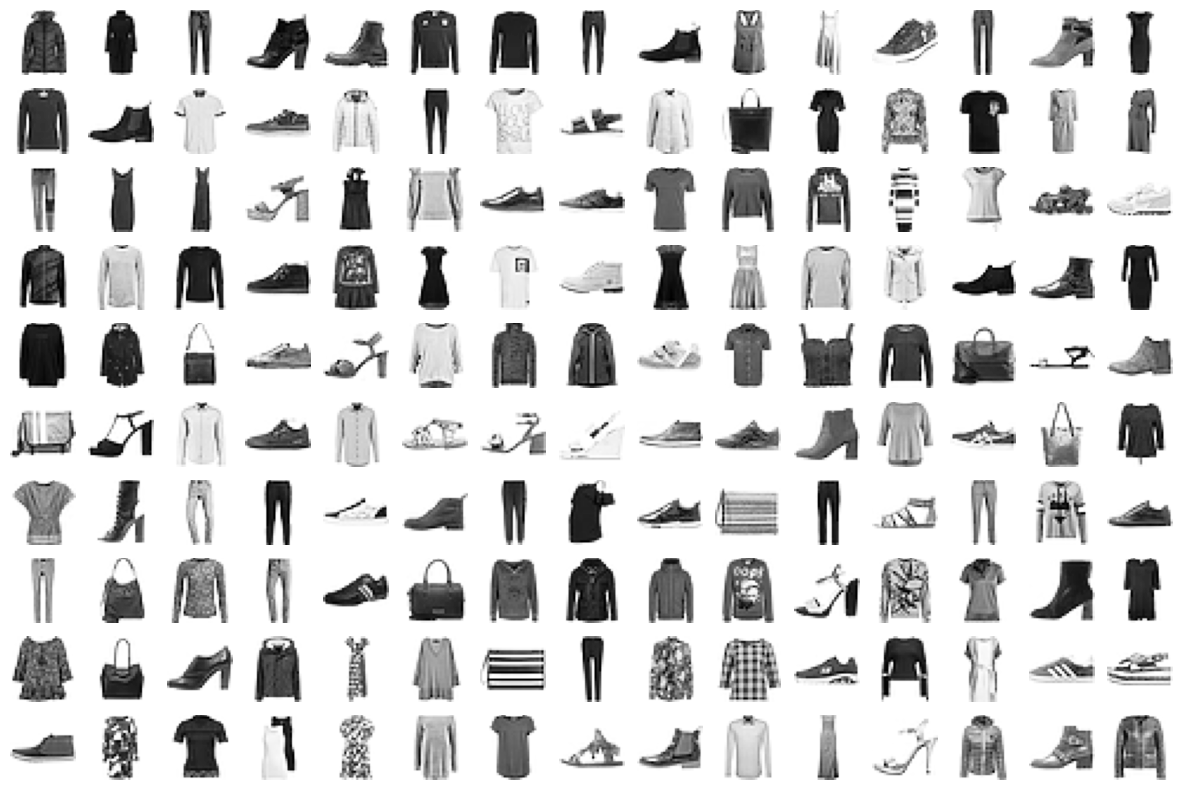

In [13]:
num_samples = 150
random_idx = np.random.randint(60000, size=num_samples)

plt.figure(figsize=(15, 10))

for i, idx in enumerate(random_idx):
    image = x_train_full[idx, :]
    label = y_train_full[idx]
    
    plt.subplot(10, 15, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image) 
    plt.grid(False)

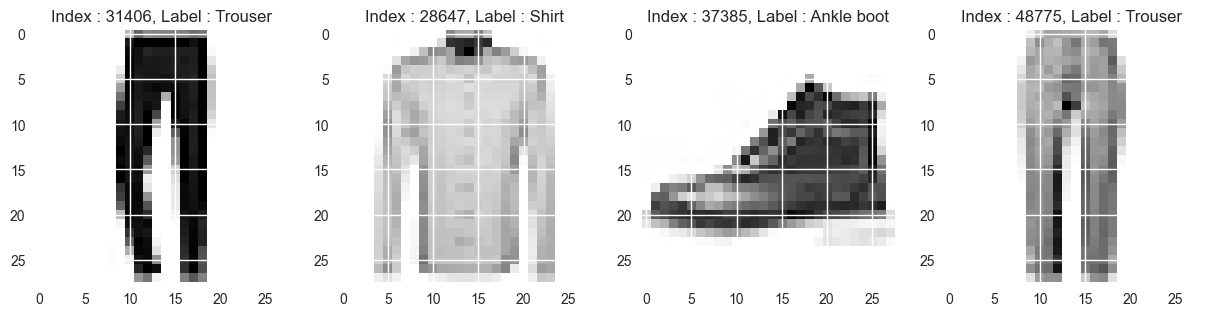

In [14]:
samples = 4

random_index = np.random.randint(60000, size=samples)
# 넘파이 랜덤으로 60000개의 데이터 중 랜덤한 4개 데이터를 추출

plt.figure(figsize=(15, 10)) 
# 그림사이즈 초기화 후

for i, idx in enumerate(random_index):
    image = x_train_full[idx, :]
    label = y_train_full[idx] 
    
    plt.subplot(1, len(random_index), i+1)
    plt.imshow(image) 
    plt.title('Index : {}, Label : {}'.format(idx, class_names[label]))
# 서브 플롯을 활용해서 그래프 도시

In [15]:
x_train = x_train / 255.
x_test = x_test / 255. 
x_val = x_val / 255.
#모델 학습 전 데이터를 표준화(학습이 더 잘되게 하기 위해서)

In [16]:
# Building a ConvNet
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'))
# 32개의 필터, 3*3커널, 스트라이드=1, 패딩=0
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(64,(3,3), activation='relu'))
# 64개의 필터, 3*3커널, 스트라이드=1, 패딩=0
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
# 심층 신경망으로 들어오기 전 형상을 1차원 백터로 변경
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
#과대적합을 방지하기 위한 드롭아웃
model.add(Dense(10, activation='softmax'))
#마지막 다중분류를 위한 층 입력

model.summary()
#컨브넷과 일반 신경망을 조합하여 모델 구성
#배치 정규화는 컨브넷에서 통상 컨브레이어 통과 후 삽입

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 64)       256       
 hNormalization)                                                 
                                                        

In [17]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [18]:
history = model.fit(x_train, y_train, epochs=40, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/40
83/83 [==============================] - 3s 10ms/step - loss: 0.7037 - acc: 0.7571 - val_loss: 1.7487 - val_acc: 0.4704
Epoch 2/40
83/83 [==============================] - 1s 7ms/step - loss: 0.4312 - acc: 0.8455 - val_loss: 1.4328 - val_acc: 0.5264
Epoch 3/40
83/83 [==============================] - 1s 7ms/step - loss: 0.3687 - acc: 0.8684 - val_loss: 1.1992 - val_acc: 0.5970
Epoch 4/40
83/83 [==============================] - 1s 7ms/step - loss: 0.3243 - acc: 0.8830 - val_loss: 0.7720 - val_acc: 0.7226
Epoch 5/40
83/83 [==============================] - 1s 7ms/step - loss: 0.3021 - acc: 0.8913 - val_loss: 0.4661 - val_acc: 0.8353
Epoch 6/40
83/83 [==============================] - 1s 7ms/step - loss: 0.2963 - acc: 0.8912 - val_loss: 0.3991 - val_acc: 0.8563
Epoch 7/40
83/83 [==============================] - 1s 7ms/step - loss: 0.2894 - acc: 0.8947 - val_loss: 0.2927 - val_acc: 0.8928
Epoch 8/40
83/83 [==============================] - 1s 7ms/step - loss: 0.2629 - acc: 0.9

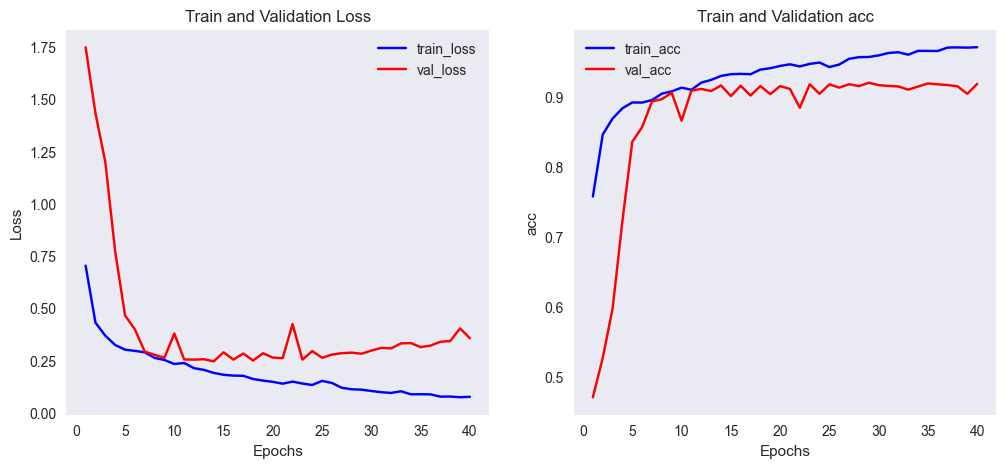

In [19]:
history_dict = history.history 

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

acc = history_dict['acc']
val_acc = history_dict['val_acc']
 
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color='red', label='val_acc')
ax2.set_title('Train and Validation acc')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('acc')
ax2.grid()
ax2.legend()

plt.show()

In [20]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3832 - acc: 0.9149


[0.38324418663978577, 0.914900004863739]

In [21]:
pred_ys = model.predict(x_test)
np.set_printoptions(precision=7)
print(pred_ys[0])

313/313 [==============================] - 0s 1ms/step
[9.1399152e-21 8.7790850e-20 2.6412751e-19 4.4165256e-19 1.1011603e-20
 4.4908907e-10 5.0653294e-19 1.0490166e-12 4.9745324e-16 1.0000000e+00]


Text(0.5, 1.0, 'predicted class : Ankle boot')

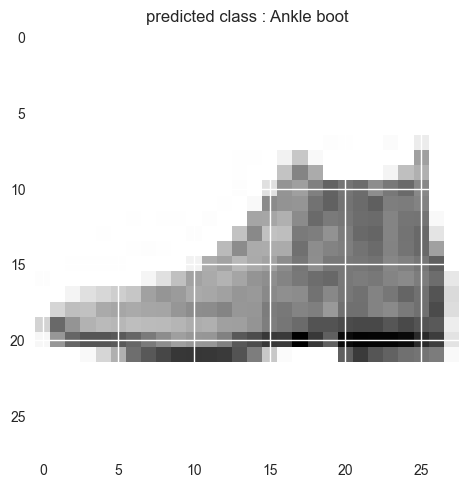

In [22]:
arg_pred_ys = np.argmax(pred_ys, axis=1)

plt.imshow(x_test[0])
plt.title('predicted class : {}'.format(class_names[arg_pred_ys[0]]))

In [23]:
def plot_image(i, pred_ys, y_test, img):
    pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(pred_ys)

    if predicted_label == y_test:
        color='blue'
    else:
        color='red'
    
    plt.xlabel('{} {:2.0f}% ({})'.format(
        class_names[predicted_label],
        100*np.max(pred_ys),
        class_names[y_test]
    ), color=color)
    

In [24]:
def plot_value_array(i, pred_ys, true_label):
    pred_ys, true_label = pred_ys[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), pred_ys, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(pred_ys)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

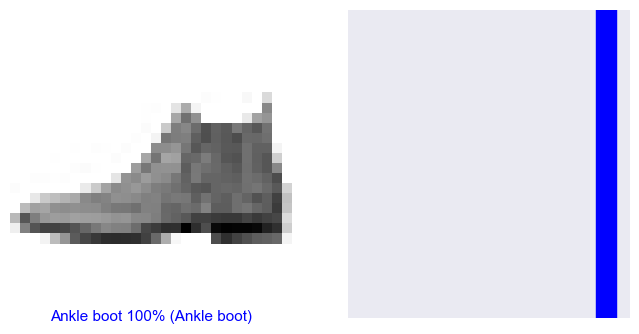

In [25]:
i = 0 
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test)
plt.subplot(1, 2, 2)
plot_value_array(i, pred_ys, y_test)
plt.show()

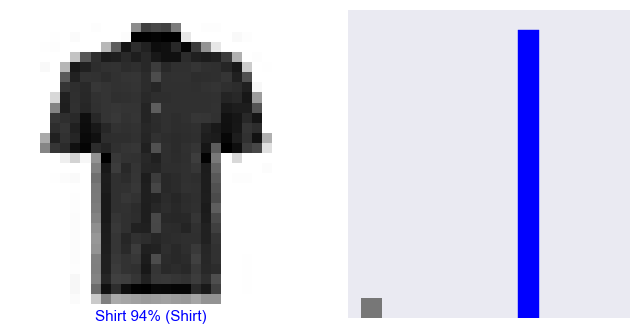

In [26]:
i = 40 
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test)
plt.subplot(1, 2, 2)
plot_value_array(i, pred_ys, y_test)
plt.show()

In [27]:
from tensorflow.keras.utils import to_categorical 

y_test_che = to_categorical(y_test)
y_test_che.shape

(10000, 10)

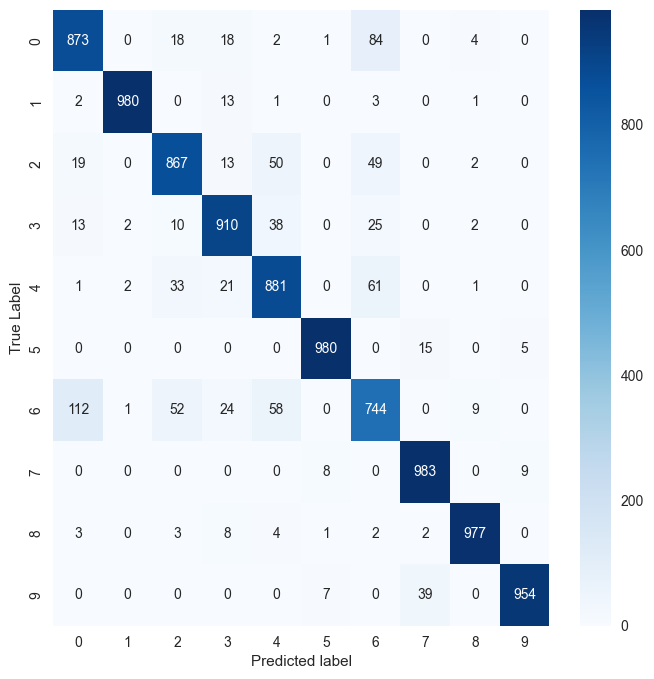

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

plt.figure(figsize=(8, 8))
cm=confusion_matrix(np.argmax(y_test_che, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True Label')
plt.show()


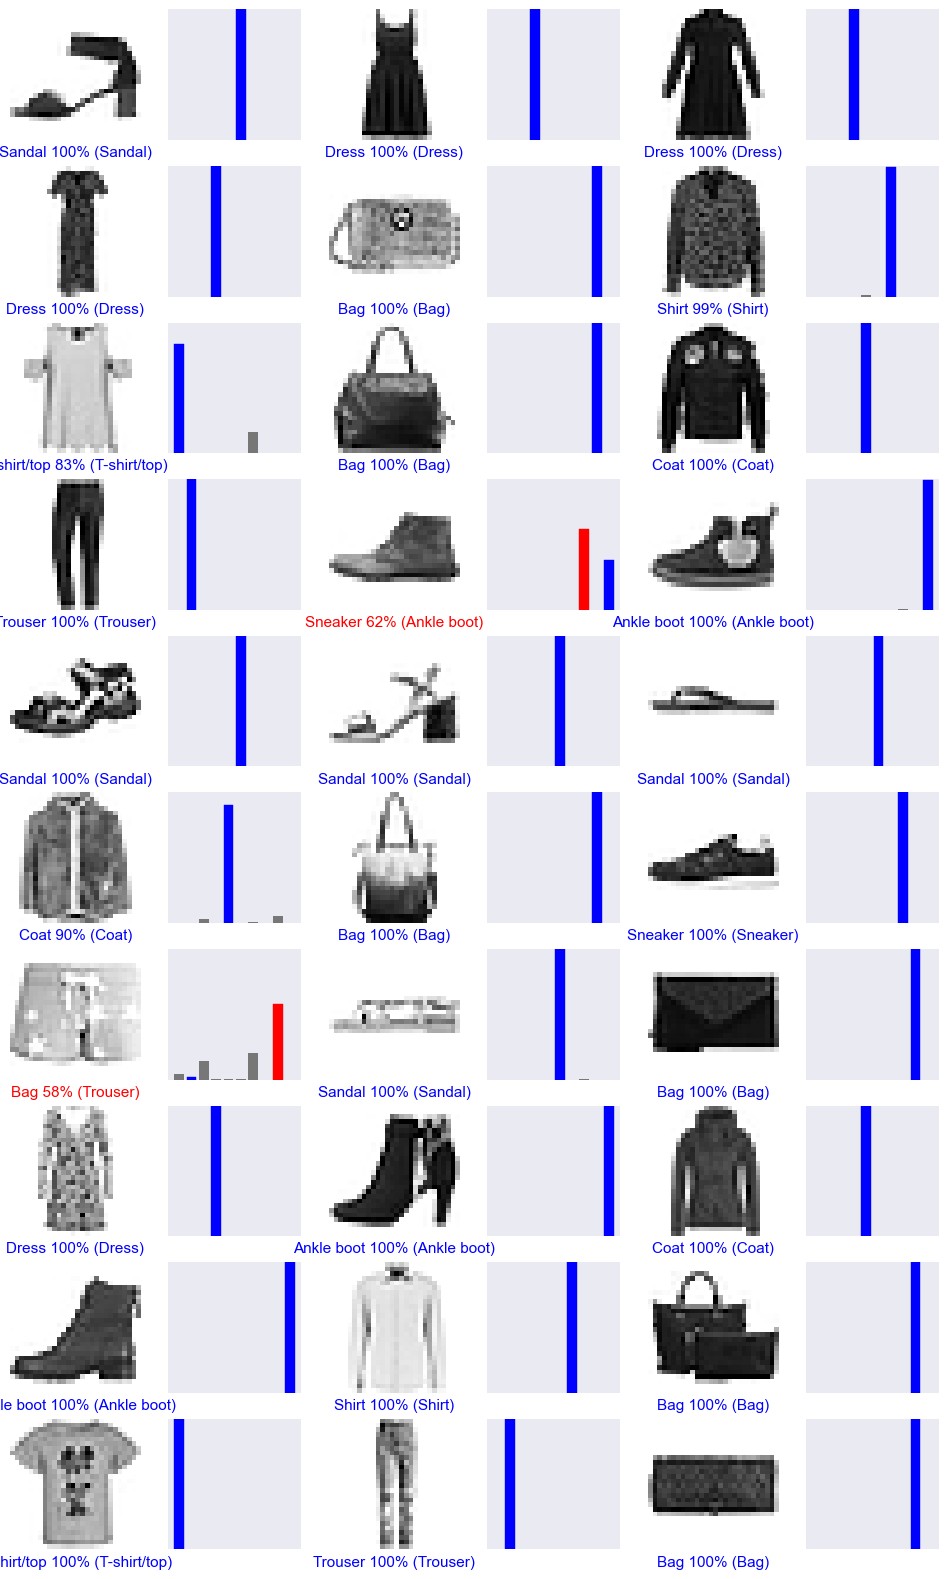

In [29]:
num_rows = 10 
num_cols = 3 

num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2*num_cols, 2*idx+1)
    plot_image(num, pred_ys, y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*idx+2)
    plot_value_array(num, pred_ys, y_test)
    

plt.show()